In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
training_data = pd.read_csv('training_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')

In [7]:
numeric_columns = training_data.select_dtypes('number').columns

In [8]:
category_columns = ['race', 'sex', 
       'marital_status', 'rent_or_own',  'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']

In [9]:
ordinal_columns = ['age_group', 'education',  'income_poverty',
        'employment_status']

In [10]:
# IMPUTING THE MISSING VALUES

In [11]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Unemployed")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'unemployed_occupation'


In [12]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Unemployed")
    if conditions.any():
        training_data.loc[i, 'employment_industry'] = 'unemployed_in_industry'
        

In [13]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Not in Labor Force")
    if conditions.any():
       training_data.loc[i, 'employment_industry'] = 'Not_in_laborforce'


In [14]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Not in Labor Force")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'Not_in_laborforce'
        

In [15]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Employed")
    if conditions.any():
        training_data.loc[i, 'employment_industry'] = 'other_industry'
        

In [16]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Employed")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'other_occupation'
        

In [17]:
income_poverty_nan = 'refused_or_unknown'
marital_status_nan = 'refused_or_other_category'
employment_status_nan = 'refused_or_other_category'
rent_or_own_nan = 'other_refused'
education_nan = 'refused_or_unknown'


training_data['income_poverty'].fillna(income_poverty_nan, inplace=True)
training_data['marital_status'].fillna(marital_status_nan, inplace=True)
training_data['employment_status'].fillna(employment_status_nan, inplace=True)
training_data['rent_or_own'].fillna(rent_or_own_nan, inplace=True)
training_data['education'].fillna(education_nan, inplace=True)

In [18]:
def missing_count(training_data): # Creating a function which returns the values which is above zero
    
    count_nan = training_data.isnull().sum()
    count_nan = count_nan[count_nan > 0].sort_values()    # To sort down the values
    
    return count_nan

In [19]:
missing_counts_as_nan = missing_count(training_data)

In [20]:
missing_counts_as_nan

behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_antiviral_meds         71
behavioral_outside_home           82
behavioral_large_gatherings       87
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_touch_face            128
behavioral_avoidance             208
household_adults                 249
household_children               249
opinion_h1n1_risk                388
opinion_h1n1_vacc_effective      391
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
health_worker                    804
child_under_6_months             820
chronic_med_condition            971
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
health_insurance               12274
dtype: int64

In [21]:
# GOOD TO GO - Now start encoding the columns

In [22]:
training_data[ordinal_columns]

,age_group,education,income_poverty,employment_status
0,55 - 64 Years,< 12 Years,Below Poverty,Not in Labor Force
1,35 - 44 Years,12 Years,Below Poverty,Employed
2,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Employed
3,65+ Years,12 Years,Below Poverty,Not in Labor Force
4,45 - 54 Years,Some College,"<= $75,000, Above Poverty",Employed
...,...,...,...,...
26702,65+ Years,Some College,"<= $75,000, Above Poverty",Not in Labor Force
26703,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Employed
26704,55 - 64 Years,Some College,refused_or_unknown,refused_or_other_category
26705,18 - 34 Years,Some College,"<= $75,000, Above Poverty",Employed


In [23]:
training_data['overall_behaviour_of_respondent'] = training_data['behavioral_antiviral_meds'] + \
training_data['behavioral_avoidance'] + training_data['behavioral_face_mask'] + \
training_data['behavioral_wash_hands'] + training_data['behavioral_large_gatherings'] + \
training_data['behavioral_outside_home'] + training_data['behavioral_touch_face']

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for features in ordinal_columns:
    training_data[features] = le.fit_transform(training_data[features])

In [25]:
training_data = pd.get_dummies(training_data, columns=category_columns, drop_first=True)

In [26]:
training_data.drop(['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask',\
                    'behavioral_wash_hands','behavioral_large_gatherings', 'behavioral_outside_home',\
                    'behavioral_touch_face'], axis=1, inplace=True)

In [27]:
final_training_data = pd.merge(training_data, labels, on='respondent_id')

In [28]:
label1 = final_training_data['h1n1_vaccine']
label2 = final_training_data['seasonal_vaccine']

In [29]:
final_training_data.drop('respondent_id', axis=1, inplace=True)

In [30]:
data = final_training_data.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1)

In [31]:
data.head()

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_unemployed_occupation,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.metrics import classification_report

In [34]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.3/224.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.0 MB/s eta 0:00:00


In [35]:
import optuna

In [36]:
from optuna import visualization

In [37]:
from optuna.samplers import TPESampler

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, label1, test_size=0.2, random_state=101)

# Define the objective function
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 6),
        'gamma': trial.suggest_float('gamma',1e-8, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
        'subsample': trial.suggest_float('subsample', 0.3, 0.8),
    }
    
    xgb = XGBClassifier(**param, missing= np.nan, tree_method="gpu_hist")
    #early_stopping_rounds=10,
    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb, data, label1, cv=5, scoring='roc_auc')
    AUC = np.mean(scores).max() #scores['test-AUC-mean'].max()
    return AUC

In [40]:
study1 = optuna.create_study(direction='maximize', sampler=TPESampler())
study1.optimize(objective, n_trials=120, show_progress_bar=True)

[I 2023-05-17 04:10:11,880] A new study created in memory with name: no-name-6f9959aa-210c-48bc-853c-29d8073fa8c6
/usr/local/lib/python3.10/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-05-17 04:10:19,373] Trial 0 finished with value: 0.7976663283966873 and parameters: {'n_estimators': 439, 'max_depth': 5, 'reg_alpha': 0.7742972518408309, 'reg_lambda': 0.7716217145278793, 'min_child_weight': 3, 'gamma': 0.3101211270135631, 'learning_rate': 0.6533876593228859, 'colsample_bytree': 0.4717209856198398, 'subsample': 0.4005588988526428}. Best is trial 0 with value: 0.7976663283966873.
[I 2023-05-17 04:10:21,883] Trial 1 finished with value: 0.8665487731235885 and parameters: {'n_estimators': 161, 'max_depth': 5, 'reg_alpha': 0.0807335051174954, 'reg_lambda': 0.6799602063870129, 'min_child_weight': 5, 'gamma': 0.12682035740537445, 'learning_rate': 0.1397401497698589, 'colsample_bytree': 0.4479696435961001, 'subsample': 0.3828870127878019}. Best is trial 1 with value: 0.8665487731235885.
[I 2023-05-17 04:10:25,652] Trial 2 finished with value: 0.7966175461177494 and parameters: {'n_estimators': 209, 'max_depth': 5, 'reg_alpha': 0.9816550997092218, 'reg_lambda': 0.6062

In [41]:
study1.best_trial

FrozenTrial(number=77, state=TrialState.COMPLETE, values=[0.8722130678283208], datetime_start=datetime.datetime(2023, 5, 17, 4, 16, 10, 668315), datetime_complete=datetime.datetime(2023, 5, 17, 4, 16, 15, 847687), params={'n_estimators': 348, 'max_depth': 5, 'reg_alpha': 0.40843160143094187, 'reg_lambda': 0.4289997446570824, 'min_child_weight': 5, 'gamma': 0.0945152168608531, 'learning_rate': 0.04023970363967418, 'colsample_bytree': 0.5405552552747159, 'subsample': 0.6985430298208245}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'reg_alpha': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'reg_lambda': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'min_child_weight': IntDistribution(high=6, log=False, low=0, step=1), 'gamma': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'learning_

In [42]:
# 43 - best trial

In [43]:
param_h1n1 = study1.best_params

In [44]:
param_h1n1

{'n_estimators': 348,
 'max_depth': 5,
 'reg_alpha': 0.40843160143094187,
 'reg_lambda': 0.4289997446570824,
 'min_child_weight': 5,
 'gamma': 0.0945152168608531,
 'learning_rate': 0.04023970363967418,
 'colsample_bytree': 0.5405552552747159,
 'subsample': 0.6985430298208245}

In [45]:
study1.pruner

In [46]:
X_train_h1, X_test_h1, y_train_h1, y_test_h1 = train_test_split(data, label1, test_size=0.2, random_state=101)

In [47]:
h1n1_model = XGBClassifier(**param_h1n1,missing= np.nan)

In [48]:
h1n1_model.fit(X_train_h1, y_train_h1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5405552552747159, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0945152168608531, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.04023970363967418, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=348, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
h1n1_predict = h1n1_model.predict(X_test_h1)

In [50]:
print(classification_report(y_test_h1, h1n1_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4199
           1       0.75      0.52      0.61      1143

    accuracy                           0.86      5342
   macro avg       0.82      0.74      0.76      5342
weighted avg       0.85      0.86      0.85      5342



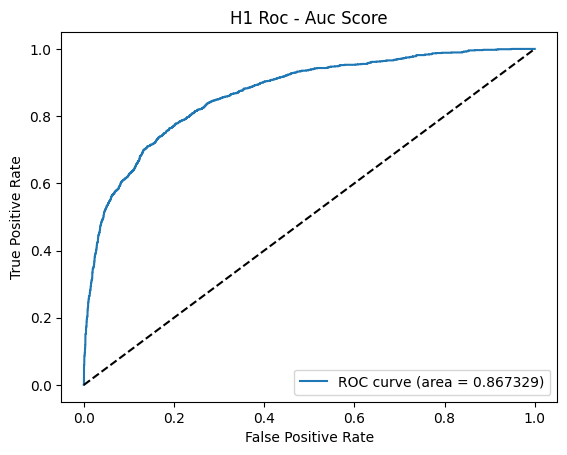

In [53]:
h1_prediction_roc = h1n1_model.predict_proba(X_test_h1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_h1, h1_prediction_roc)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('H1 Roc - Auc Score')
plt.legend(loc="lower right")
plt.show()

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

h1_prediction_roc = h1n1_model.predict_proba(X_test_h1)[:, 1]

roc_auc = roc_auc_score(y_test_h1, h1_prediction_roc)

print('ROC - AUC score :' , roc_auc)

ROC - AUC score : 0.8673285332069858


In [54]:
X_train.shape

(21365, 84)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, label2, test_size=0.2, random_state=101)

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 6),
        'gamma': trial.suggest_float('gamma',1e-8, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
        'subsample': trial.suggest_float('subsample', 0.3, 0.8),

    }
    
    xgb = XGBClassifier(**param, missing= np.nan, tree_method="gpu_hist")
    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb, data, label2, cv=5, scoring='roc_auc')
    AUC = np.mean(scores).max()
    return AUC

In [56]:
study2 = optuna.create_study(direction='maximize', sampler=TPESampler())
study2.optimize(objective, n_trials=120, show_progress_bar=True)

[I 2023-05-17 04:48:14,339] A new study created in memory with name: no-name-c70fd57a-4a8c-48e9-a4f6-025013f02ec9
/usr/local/lib/python3.10/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-05-17 04:48:18,076] Trial 0 finished with value: 0.8114424554538908 and parameters: {'n_estimators': 211, 'max_depth': 7, 'reg_alpha': 0.7182014945804607, 'reg_lambda': 0.5162178744274323, 'min_child_weight': 0, 'gamma': 0.8947923786031802, 'learning_rate': 0.706210475062289, 'colsample_bytree': 0.33090050490588047, 'subsample': 0.6150262155493363}. Best is trial 0 with value: 0.8114424554538908.
[I 2023-05-17 04:48:22,413] Trial 1 finished with value: 0.8095079033977924 and parameters: {'n_estimators': 175, 'max_depth': 7, 'reg_alpha': 0.8070233850729291, 'reg_lambda': 0.8316890060120955, 'min_child_weight': 2, 'gamma': 0.930097767650785, 'learning_rate': 0.7591153393176006, 'colsample_bytree': 0.5972033834360543, 'subsample': 0.6748763500950471}. Best is trial 0 with value: 0.8114424554538908.
[I 2023-05-17 04:48:28,253] Trial 2 finished with value: 0.8328665622871793 and parameters: {'n_estimators': 441, 'max_depth': 6, 'reg_alpha': 0.24408105004427022, 'reg_lambda': 0.87836

In [ ]:
# 45. Best value: 0.864825:

In [57]:
param_seasonal = study2.best_params

In [58]:
param_seasonal

{'n_estimators': 434,
 'max_depth': 5,
 'reg_alpha': 0.9766017337822652,
 'reg_lambda': 0.2730365293696804,
 'min_child_weight': 6,
 'gamma': 0.3071354382919159,
 'learning_rate': 0.028274155810668576,
 'colsample_bytree': 0.682522814465883,
 'subsample': 0.4551216528017537}

In [59]:
X_train_seas, X_test_seas, y_train_seas, y_test_seas = train_test_split(data, label2, test_size=0.2, random_state=101)

In [60]:
seasonal_model = XGBClassifier(**param_seasonal, missing= np.nan)

In [61]:
seasonal_model.fit(X_train_seas, y_train_seas)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.682522814465883, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3071354382919159, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.028274155810668576, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=434, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
seas_predict = seasonal_model.predict(X_test_seas)

In [63]:
print(classification_report(y_test_seas, seas_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2823
           1       0.79      0.75      0.77      2519

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.79      0.79      5342



In [64]:
seasonal_prediction_roc = seasonal_model.predict_proba(X_test_seas)[:, 1]

roc_auc = roc_auc_score(y_test_seas, seasonal_prediction_roc)

print('ROC - AUC score :' , roc_auc)

ROC - AUC score : 0.8677329659096709


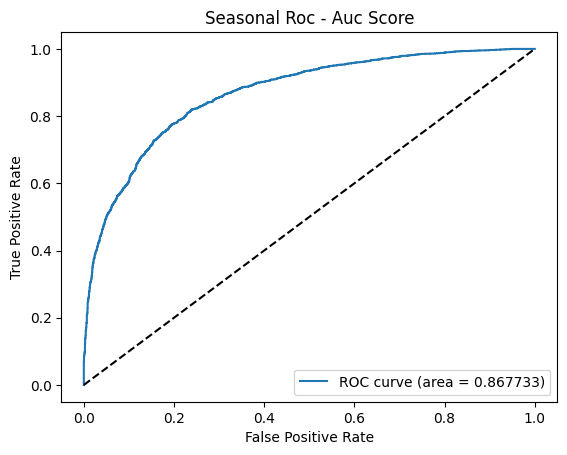

In [65]:
seasonal_prediction_roc = seasonal_model.predict_proba(X_test_seas)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_seas, seasonal_prediction_roc)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Seasonal Roc - Auc Score')
plt.legend(loc="lower right")
plt.show()

In [66]:
from joblib import dump

dump(h1n1_model, 'H1N1_joblib_FE_with_dropping.joblib')

['H1N1_joblib_FE_with_dropping.joblib']

In [67]:
dump(seasonal_model, 'Seasonal_joblib_FE_with_dropping.joblib')

['Seasonal_joblib_FE_with_dropping.joblib']